# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]
plt.rcParams.update({'font.size': 14})

# Government debt

In [2]:
def simulation(g,pi,r,s,qm,d0,T,tau=None,Delta=0):
    
    # a. allocate
    Y = np.empty(T)
    P = np.empty(T)
    D = np.empty(T)
    
    # b. nominal interest rate
    i = (1+r)*(1+pi)-1
    
    # c. simulate
    for t in range(T):
        
        if t == 0:
            Y[t] = 1
            P[t] = 1
            D[t] = d0*Y[t]*P[t]
        else:
            Y[t] = Y[t-1]*(1+g)
            P[t] = P[t-1]*(1+pi)
            D[t] = D[t-1] + i*D[t-1] - (s+qm)*P[t-1]*Y[t-1]
            
        if not tau is None:
            if t == tau: D[t] += Delta*Y[t]*P[t]
           
    return D/(P*Y)

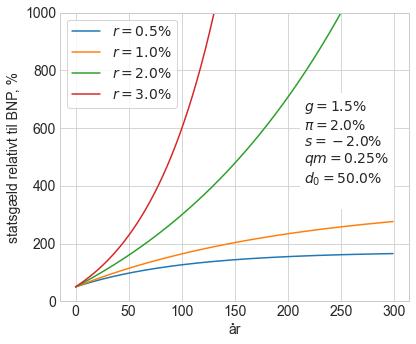

In [3]:
# a. parameters        
pi = 0.02
r = 0.03
g = 0.015
s = -0.02
qm = 0.0025
d0 = 0.5
T = 300

# d. figure
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
for r in [0.005,0.01,0.02,0.03]:
    d = simulation(g,pi,r,s,qm,d0,T)*100
    ax.plot(np.arange(T),d,label=f'$r = {r*100:.1f} \%$')
ax.set_xlabel('år')
ax.set_ylabel('statsgæld relativt til BNP, %')
ax.grid(True)
ax.set_ylim([0,1000])
ax.legend(frameon=True,loc='upper left')


text = ''
text += f'$g = {g*100:.1f}\%$\n'
text += f'$\pi = {pi*100:.1f}\%$\n'
text += f'$s = {s*100:.1f}\%$\n'
text += f'$qm = {qm*100:.2f}\%$\n'
text += f'$d_0 = {d0*100:.1f}\%$\n'
ax.text(0.7,0.70,text,backgroundcolor='white',verticalalignment='top',transform=ax.transAxes)

fig.tight_layout()
fig.savefig('statsgælds_forskellige_r.pdf')

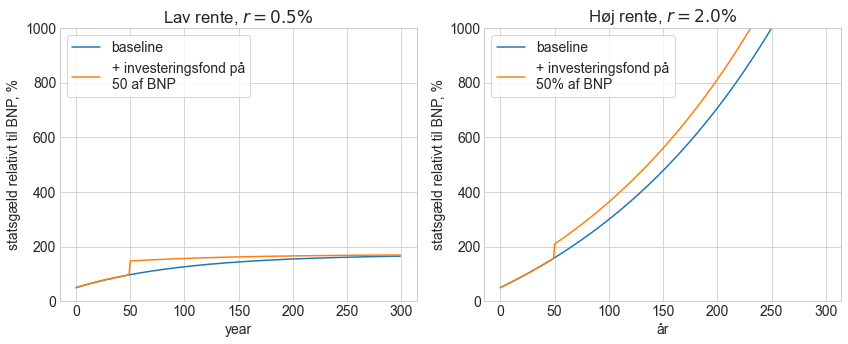

In [4]:
tau = 50
Delta = 0.5

fig = plt.figure(figsize=(12,5))

# lav rente
ax = fig.add_subplot(1,2,1)

r = 0.005
d = simulation(g,pi,r,s,qm,d0,T)*100
ax.plot(np.arange(T),d,label=f'baseline')

d = simulation(g,pi,r,s,qm,d0,T,tau=tau,Delta=Delta)*100
ax.plot(np.arange(T),d,label=f'+ investeringsfond på\n{np.int(Delta*100)} af BNP')

ax.set_xlabel('year')
ax.set_ylabel('statsgæld relativt til BNP, %')
ax.grid(True)
ax.set_ylim([0,1000])
ax.set_title(f'Lav rente, $r = {r*100}\%$')
ax.legend(frameon=True,loc='upper left')

# høj rente
ax = fig.add_subplot(1,2,2)

r = 0.0200
d = simulation(g,pi,r,s,qm,d0,T)*100
ax.plot(np.arange(T),d,label=f'baseline')

d = simulation(g,pi,r,s,qm,d0,T,tau=tau,Delta=Delta)*100
ax.plot(np.arange(T),d,label=f'+ investeringsfond på\n{np.int(Delta*100)}% af BNP')

ax.set_xlabel('år')
ax.set_ylabel('statsgæld relativt til BNP, %')
ax.grid(True)
ax.set_ylim([0,1000])
ax.set_title(f'Høj rente, $r = {r*100}\%$')
ax.legend(frameon=True,loc='upper left')

fig.tight_layout()
fig.savefig('statsgælds_investeringsfond.pdf')